## Importation des bibliothèques necessaires

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
np.random.seed(42) #pour garantit la reproductibilité

## Dataset Titanic 
Le dataset Titanic est un ensemble de données utilisé pour analyser les facteurs influençant la survie des passagers lors du naufrage du Titanic en 1912. Il contient des informations détaillées sur les passagers, notamment leur identité, leur classe sociale, leur âge et leur tarif de billet.

### Variables du dataset
- **PassengerId** : Identifiant unique attribué à chaque passager.
- **Survived** : Indique si le passager a survécu (1 = Oui, 0 = Non).
- **Pclass** : Classe du billet du passager (1 = Première, 2 = Deuxième, 3 = Troisième).
- **Name** : Nom complet du passager.
- **Sex** : Sexe du passager (male = Homme, female = Femme).
- **Age** : Âge du passager en années.
- **SibSp** : Nombre de frères, sœurs ou conjoints présents à bord.
- **Parch** : Nombre de parents ou enfants présents à bord.
- **Ticket** : Numéro du billet du passager.
- **Fare** : Tarif payé pour le billet.
- **Cabin** : Numéro de la cabine attribuée.
- **Embarked** : Port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton).

## Chargement du dataset et Exploration des données

In [3]:
titanic_dataset = pd.read_csv("Titanic-Dataset.xls")

In [4]:
# j'affiche quelque ligne de données
titanic_dataset.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [5]:
#j'affiche des informations sur les données
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<span style='color:red'>**Remarque** : </span></br> Les colonnes Age, Cabin, et Embarked contiennent des valeurs manquantes (NaN), car leur nombre de "non-null" est inférieur à 891.

In [6]:
#j'affiche les statistiques pour les variables numeriques
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# j'affiche les statistiques pour les variables categorielles
titanic_dataset.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
# analyse de la variable Pclass 
pclass_counts = titanic_dataset['Pclass'].value_counts()
pclass_counts

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

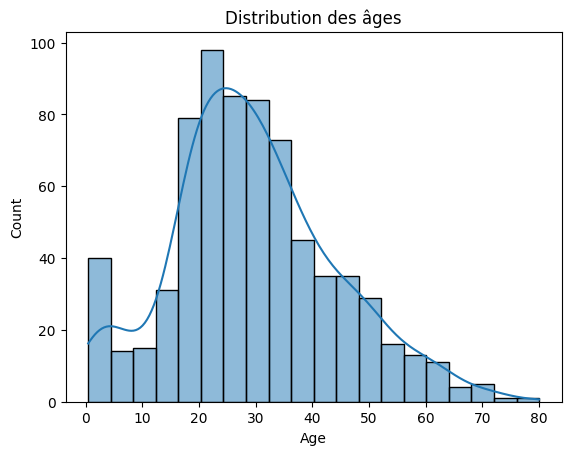

In [9]:
sns.histplot(titanic_dataset['Age'], kde=True)
plt.title("Distribution des âges")
plt.show()

- La population du Titanic était jeune, avec peu de personnes âgées.

In [10]:
# analyse de la variable cible (Survived)
survival_counts = titanic_dataset['Survived'].value_counts()
survival_counts

Survived
0    549
1    342
Name: count, dtype: int64

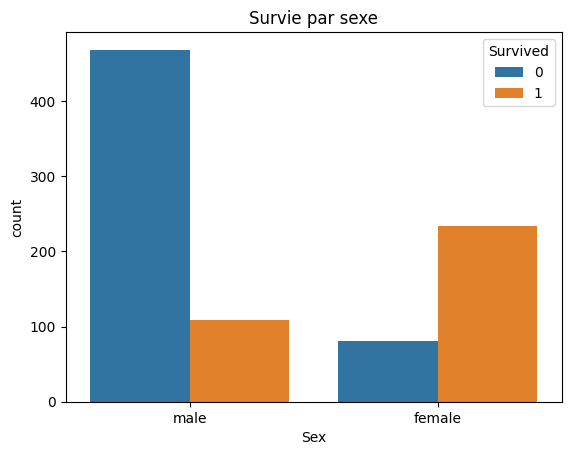

In [11]:
# visualisation de survie par sexe
sns.countplot(x='Sex', hue='Survived', data=titanic_dataset)
plt.title("Survie par sexe")
plt.show()

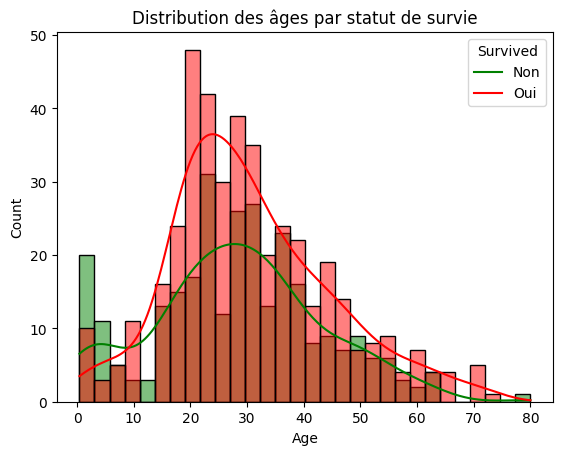

In [12]:
sns.histplot(data=titanic_dataset, x='Age', hue='Survived', 
             bins=30, kde=True, palette=['red', 'green'])
plt.title("Distribution des âges par statut de survie")
plt.legend(title='Survived', labels=['Non', 'Oui'])
plt.show()

- Gros volume de morts dans la tranche 20-30 ans, priorité donnée aux enfants et aux personnes âgées. (On peut dire que la survie dépend fortement de l'âge)

<span style='color:red'>**Remarques globales** : </span></br>
- Le dataset contient 891 passagers avec des variables numériques et catégorielles.
- Environ 20% des valeurs d’**âge** sont manquantes.
- La majorité des passagers sont des **hommes** et de **3e classe**.
- La variable `Fare` contient des **valeurs extrêmes**, et les valeurs sont trop dispersées (jusqu’à 512, qui peut etre dans la 1ere classe).
- La colonne `Cabin` est **très incomplète** (77% de valeurs manquantes).
- Le port `Embarked` a 2 valeurs manquantes, `S` est le plus fréquent.
- Le jeu de données est **déséquilibré** : ~38% ont survécu.
- Les femmes ont beaucoup **plus survécu** que les hommes lors du naufrage du Titanic
- La **population** du Titanic était **jeune**, avec peu de personnes âgées.
- Gros volume de morts dans la tranche 20-30 ans, priorité donnée aux enfants et aux personnes âgées. (On peut dire que la survie dépend fortement de l'âge)

## Prétraitement

#### Prétraitement effectué
- **Suppression des colonnes inutiles et qui sont très incomplètes** (Ticket, Name -> inutiles, Cabin -> très incomplète)
- **Imputation des valeurs manquantes** :
  - L'âge par la médiane
  - Embarked par la valeur la plus fréquente
- **Encodage des variables catégorielles**, parceque les modeles comme la régression logistique, KNN, SVM et d'autres ne comprennet que des nombres, pas des chaînes de caractères.
-  **La standardisation des données** pour les mettre centrées en 0 avec un écart-type de 1, parceque certaines variables numériques (comme Fare) ont des valeurs très grandes, d'autres (comme Pclass) des valeurs petites. Cela peut perturber certains modèles, en particulier ceux qui utilisent des distances ou des gradients.

In [13]:
# suppression de Ticket, Name et Cabin
titanic_dataset.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

# imputation d' Age 
titanic_dataset['Age'] = titanic_dataset['Age'].fillna(titanic_dataset['Age'].median())

# imputation d' Embarked
titanic_dataset['Embarked'] = titanic_dataset['Embarked'].fillna(titanic_dataset['Embarked'].mode()[0])


In [14]:
# encoder les variables categorielles
# création des encodeurs
sex_encoder = LabelEncoder()
embarked_encoder = LabelEncoder()

# encodage et sauvegarde
titanic_dataset['Sex'] = sex_encoder.fit_transform(titanic_dataset['Sex'])
titanic_dataset['Embarked'] = embarked_encoder.fit_transform(titanic_dataset['Embarked'])
# N.B que LabelEncoder trie d'abord les valeurs avant qu'il encode

# standardiser les données numériques
scaler1 = StandardScaler()
scaler2 = StandardScaler()

titanic_dataset[['Fare']] = scaler1.fit_transform(titanic_dataset[['Fare']])
titanic_dataset[['Age']] = scaler2.fit_transform(titanic_dataset[['Age']])

In [15]:
# j'affiche quelque ligne de données
titanic_dataset.head(8)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,-0.565736,1,0,-0.502445,2
1,2,1,1,0,0.663861,1,0,0.786845,0
2,3,1,3,0,-0.258337,0,0,-0.488854,2
3,4,1,1,0,0.433312,1,0,0.420730,2
4,5,0,3,1,0.433312,0,0,-0.486337,2
5,6,0,3,1,-0.104637,0,0,-0.478116,1
6,7,0,1,1,1.893459,0,0,0.395814,2
7,8,0,3,1,-2.102733,3,1,-0.224083,2


In [16]:
titanic_dataset[['Age', 'Fare']].describe()

,Age,Fare
count,8.910000e+02,8.910000e+02
mean,2.272780e-16,3.987333e-18
std,1.000562e+00,1.000562e+00
min,-2.224156e+00,-6.484217e-01
25%,-5.657365e-01,-4.891482e-01
50%,-1.046374e-01,-3.573909e-01
75%,4.333115e-01,-2.424635e-02
max,3.891554e+00,9.667167e+00


In [17]:
# Revenir aux valeurs originales
#titanic_dataset[['Fare']] = scaler.inverse_transform(titanic_dataset[['Fare']])
#titanic_dataset[['Fare']] = scaler1.inverse_transform(titanic_dataset[['Fare']])
#titanic_dataset[['Age']] = scaler2.inverse_transform(titanic_dataset[['Age']])

### Séparation train/test 

In [18]:
X = titanic_dataset.drop(columns=['Survived', 'PassengerId'])
y = titanic_dataset['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
# verification 
print("Taille X_train :", X_train.shape)
print("Taille X_test  :", X_test.shape)
print("\nRepartition classes (train):")
print(y_train.value_counts(normalize=True))

Taille X_train : (712, 7)
Taille X_test  : (179, 7)

Repartition classes (train):
Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64


## K-Nearest Neighbors (KNN) 

Le **K-Nearest Neighbors (KNN)** est un algorithme d’**apprentissage supervisé** simple et intuitif utilisé pour la **classification** et la **régression**.

**Le principe est le suivant* :
Pour prédire la classe d’un nouvel échantillon, KNN regarde ses K plus proches voisins dans l’espace des caractéristiques (calculés par une distance, souvent Euclidienne) dans les données d’entraînement.

La prédiction se fait ensuite par **vote majoritaire (classification)** ou **moyenne (régression)** des voisins les plus proches.

In [61]:
# definition de model KNN
knn_model = KNeighborsClassifier()

# Grille des paramètres (k de 1 à 20)
param_grid = {'n_neighbors': list(range(1, 20))}

# configuration de GridSearchCV avec 5 partition
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')

# lancer la recherche sur les données d'entrainement
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [67]:
# le meilleur k trouvé 
best_k = grid_search.best_params_['n_neighbors']
print(f"Meilleur k trouvé par GridSearchCV : {best_k}")

Meilleur k trouvé par GridSearchCV : 14


In [63]:
# entrainer le KNN avec le meilleur k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [68]:
train_acc = best_knn.score(X_train, y_train)
print('Accuracy sur train :',train_acc)

Accuracy sur train : 0.8286516853932584


In [69]:
# entrainer sur les données de test 
y_pred = best_knn.predict(X_test)

In [70]:
# evaluation 
knn_accuracy_score = accuracy_score(y_test, y_pred)
knn_classification_report = classification_report(y_test, y_pred)
knn_confusion_matrix = confusion_matrix(y_test, y_pred)
print("\n Accuracy sur test :", knn_accuracy_score)
print("\n Rapport de classification :\n", knn_classification_report)
print("\n Matrice de confusion :\n", knn_confusion_matrix)


 Accuracy sur test : 0.7653631284916201

 Rapport de classification :
               precision    recall  f1-score   support

           0       0.77      0.87      0.82       110
           1       0.75      0.59      0.66        69

    accuracy                           0.77       179
   macro avg       0.76      0.73      0.74       179
weighted avg       0.76      0.77      0.76       179


 Matrice de confusion :
 [[96 14]
 [28 41]]


<span style='color:red'>**Remarques globales** : </span></br>

- Accuracy de **76,5%** - performance correcte mais perfectible (on peut l'ameliorer)
- **Classe 0** : Bien performante (précision 77%, rappel 87%, F1-score 82%)
- **Classe 1** : Problématique (précision 75%, rappel faible 59%, F1-score 66%)
- Le modèle a tendance à mieux identifier la classe 0 qu'à détecter tous les cas de la classe 1. Cela se voit dans la matrice de confusion où 41 échantillons de classe 1 sont mal classifiés comme classe 0.
- Mais, avec la précision sur train qui est **82%**, et celle sur test qui est **76.5%**, cela indique un **début d’overfitting**. Le modèle semble mieux mémoriser les données d’entraînement que généraliser à de nouvelles données.

## La régression logistique (Logistic Regression)

La régression logistique est un algorithme de classification supervisée qui **modélise la probabilité d'appartenance à une classe** (ex: survivant ou non).
Elle est basée sur une fonction sigmoïde qui transforme une combinaison linéaire des variables en une probabilité entre 0 et 1.

In [74]:
# definir le modele
logreg = LogisticRegression(max_iter=1000)
# entrainer le modele
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [75]:
print(f"Nombre d'itérations avant convergence : {logreg.n_iter_[0]}")

Nombre d'itérations avant convergence : 14


In [78]:
train_acc = logreg.score(X_train, y_train)
print('Accuracy sur train :',train_acc)

Accuracy sur train : 0.8019662921348315


In [76]:
# prediction des classes des données de test 
y_pred_logreg = logreg.predict(X_test)

In [77]:
# evaluation
logreg_accuracy_score = accuracy_score(y_test, y_pred_logreg)
logreg_classification_report = classification_report(y_test, y_pred_logreg)
logreg_confusion_matrix = confusion_matrix(y_test, y_pred_logreg)

print(" Logistic Regression - Accuracy:", logreg_accuracy_score)
print("\n Classification Report:\n", logreg_classification_report)
print("\n Confusion Matrix:\n", logreg_confusion_matrix)

 Logistic Regression - Accuracy: 0.8044692737430168

 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


 Confusion Matrix:
 [[98 12]
 [23 46]]


<span style='color:red'>**Remarques globales** : </span></br>

- Le modèle de régression logistique a convergé en 14 itérations, ce qui montre une bonne condition numérique des données (grâce à la standardisation, les variables ont la même échelle).
- Accuracy de **80,4%** - amélioration notable par rapport au modèle précédent (+4%)
- **Classe 0** : Précision 81%, rappel 89%, F1-score 85%, 98 vrais positifs, 12 faux négatifs (amélioration : -2 erreurs)
- **Classe 1** : Précision 79%, rappel 67%, F1-score 72%, 46 vrais positifs, 23 faux négatifs (forte amélioration : -18 erreurs)
- La régression logistique réduit les erreurs de classification de la classe 1 (23 faux négatifs vs 41 précédemment), mais conserve un biais vers la classe majoritaire avec encore 23 cas de classe 1 mal identifiés.
- Aussi, il montre une bonne capacité de généralisation, avec une accuracy similaire sur les jeux d'entraînement et de test. Cela indique une absence d'**overfitting**.


## Decision Tree Classifier
Un arbre de décision est un modèle de **classification supervisée** qui prend des décisions en suivant des règles **"si...alors"** à chaque nœud.

Il divise les données en sous-groupes en fonction des **valeurs des variables,** jusqu'à ce qu'il atteigne une **prédiction** (feuille de l'arbre).

In [40]:
# definir le modele 
tree_model = DecisionTreeClassifier(random_state=42)

# Grille de paramètres à tester
param_grid = {
    'max_depth': [3,4, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2,3, 4],
    'criterion': ['gini', 'entropy']
}

In [41]:
# configuration de la recherche
grid_search_tree = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 10],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [42]:
print("Meilleurs hyperparamètres trouvés :")
print(grid_search_tree.best_params_)
print(f"Accuracy moyenne CV : {grid_search_tree.best_score_:.4f}")

Meilleurs hyperparamètres trouvés :
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy moyenne CV : 0.8231


In [43]:
# entrainer le modele avec les meilleurs parametres
best_tree = DecisionTreeClassifier(**grid_search_tree.best_params_, random_state=42)
### **grid_search_tree pour decomposer le dictio des parametres 
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5, random_state=42)

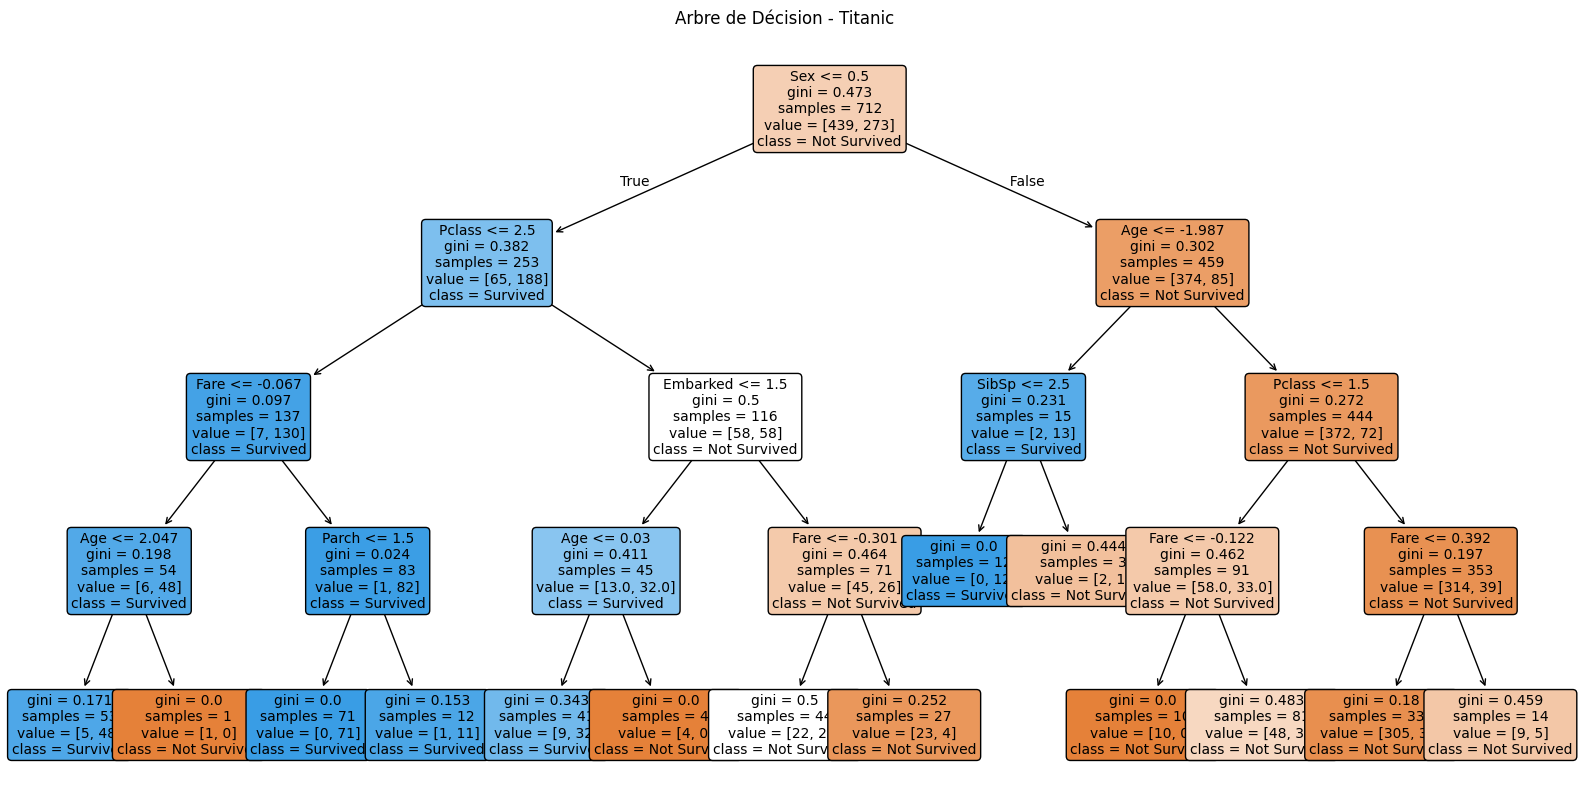

In [44]:
#afficher l'arbre de décision 
plt.figure(figsize=(20, 10))  
plot_tree(
    best_tree,                   
    feature_names=X.columns,     
    class_names=['Not Survived', 'Survived'],  
    filled=True,                 
    rounded=True,                
    fontsize=10
)
plt.title("Arbre de Décision - Titanic")
plt.show()

In [45]:
# extraire les importances des variables
importances = best_tree.feature_importances_

# creer une serie pandas pour lier à chaque nom de colonne
feat_importances = pd.Series(importances, index=X.columns)

# afficher les importances triées par ordre decroissant
print("Importance des variables :")
print(feat_importances.sort_values(ascending=False))


Importance des variables :
Sex         0.580692
Pclass      0.197414
Age         0.116982
Fare        0.054413
Embarked    0.037482
SibSp       0.012201
Parch       0.000815
dtype: float64


In [46]:
# predire les classes des données de test
y_pred_tree = best_tree.predict(X_test)

best_tree_accuracy_score = accuracy_score(y_test, y_pred_tree)
best_tree_classification_report = classification_report(y_test, y_pred_tree)
best_tree_confusion_matrix = confusion_matrix(y_test, y_pred_tree)

# Évaluation
print("\n Decision Tree - Accuracy:", best_tree_accuracy_score)
print("\n Rapport de classification :\n", best_tree_classification_report)
print("\n Matrice de confusion :\n",best_tree_confusion_matrix)


 Decision Tree - Accuracy: 0.7877094972067039

 Rapport de classification :
               precision    recall  f1-score   support

           0       0.76      0.95      0.85       110
           1       0.86      0.54      0.66        69

    accuracy                           0.79       179
   macro avg       0.81      0.74      0.75       179
weighted avg       0.80      0.79      0.77       179


 Matrice de confusion :
 [[104   6]
 [ 32  37]]


<span style='color:red'>**Remarques globales** : </span></br>

- Top 3 variables importantes sont : Sex, Pclass, Age 
- **Classe 0** : Précision 76%, rappel excellent 95%, F1-score 85%
- **Classe 1** : Précision améliorée 86%, rappel faible 54%, F1-score 66%
- Meilleur rappel pour la classe 0 mais rappel de la classe 1 dégradé
- **Classe 0** : 104 vrais positifs, 6 faux négatifs (très peu d'erreurs)
- **Classe 1** : 37 vrais positifs, 32 faux négatifs (beaucoup de cas manqués)
- Le modèle favorise fortement la classe majoritaire
- Pour conclure : L'arbre optimisé réduit le surapprentissage mais développe un biais encore plus fort vers la classe majoritaire avec 32 cas de classe 1 manqués, montrant une stratégie conservatrice qui privilégie la précision globale au détriment de la détection de la classe minoritaire.

## Random Forest Classifier

C’est un ensemble d’arbres de décision.
Chaque arbre est entraîné sur un sous-échantillon aléatoire des données et vote pour prédire la classe.
Cela réduit le surapprentissage tout en gardant la flexibilité des arbres.

In [47]:
# deinir le modele de base 
rf_model = RandomForestClassifier(random_state=42)

# grille des hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],        
    'max_depth': [3,4, 5,8],            
    'min_samples_split': [2, 5],           
    'min_samples_leaf': [1, 2]             
}

# grid Search avec validation croisée 5 partitions
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 8], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [48]:
# meilleurs paramètres
print("Meilleurs paramètres trouvés :")
print(grid_search_rf.best_params_)
print(f"Accuracy moyenne CV : {grid_search_rf.best_score_:.4f}")

Meilleurs paramètres trouvés :
{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy moyenne CV : 0.8288


In [49]:
# entrainer le modele avec les meilleurs parametres 
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=50, random_state=42)

In [52]:
# l'importance des variables
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)

Sex         0.461530
Pclass      0.168054
Fare        0.150376
Age         0.090630
SibSp       0.055120
Parch       0.038772
Embarked    0.035519
dtype: float64

In [53]:
# evaluation 
y_pred_rf = best_rf.predict(X_test)

best_rf_accuracy_score = accuracy_score(y_test, y_pred_rf)
best_rf_classification_report =  classification_report(y_test, y_pred_rf)
best_rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf)
print("Random Forest - Accuracy:", best_rf_accuracy_score)
print("\nRapport de classification :\n", best_rf_classification_report)
print("\nMatrice de confusion :\n",best_rf_confusion_matrix)

Random Forest - Accuracy: 0.7932960893854749

Rapport de classification :
               precision    recall  f1-score   support

           0       0.78      0.92      0.85       110
           1       0.82      0.59      0.69        69

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.80      0.79      0.79       179


Matrice de confusion :
 [[101   9]
 [ 28  41]]


<span style='color:red'>**Remarques globales** : </span></br>

- Accuracy de **79,3%** - performance intermédiaire, proche de l'arbre optimisé
- **Classe 0** : Précision 78%, rappel excellent 92%, F1-score 85%
- **Classe 1** : Précision améliorée 82%, rappel modéré 59%, F1-score 69%
- Meilleur équilibre précision/rappel que l'arbre optimisé pour la classe 1
- **Classe 0** : 101 vrais positifs, 9 faux négatifs
- **Classe 1** : 41 vrais positifs, 28 faux négatifs
- Amélioration significative : +4 vrais positifs et -4 faux négatifs pour classe 1 vs arbre optimisé
- Top trois variables plus importantes : Sex, Pclass, Fare
- Pour conclure, le Random Forest améliore la détection de la classe 1 avec 28 faux négatifs (vs 32 pour l'arbre optimisé) tout en maintenant une bonne performance globale, confirmant que le sexe est le facteur prédictif dominant pour la survie sur le Titanic.

## Réseau de Neurones simple avec Keras

Le modèle suivant est un **réseau de neurones artificiel simple** pour prédire la variable cible Survived du dataset Titanic.
Le modèle est construit en utilisant l’API **Sequential** de Keras et se compose des éléments suivants :

- Une **couche d'entrée** adaptée à la taille des données d'entrée **(Input(shape=...))**.
- Deux **couches cachées** entièrement connectées **(Dense)** avec respectivement 16 et 8 neurones, utilisant la fonction d'activation **ReLU** pour introduire de la non-linéarité.
- Une **couche de sortie** avec un seul neurone et une **activation sigmoïde**, produisant une probabilité de survie (valeur entre 0 et 1).

Le modèle est entraîné avec l'optimiseur **Adam**, une fonction de perte adaptée à la classification binaire **(binary_crossentropy)**, et l'indicateur de performance **accuracy**.

Paramètres d’entraînement : 

- **Époques** : 30 passes sur les données d'entraînement.
- **Taille de batch** : 16 échantillons par mise à jour des poids.
- **Validation** : 20% des données d’entraînement sont utilisées pour la validation interne.

In [54]:
# construction du modele
nn_model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(16, activation='relu'), 
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [26]:
# compilation du modele
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
# entrainement du modele
history = nn_model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.2, verbose=0)

In [28]:
loss, accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {accuracy}")

Accuracy: 0.826815664768219


In [29]:
y_pred = (nn_model.predict(X_test) > 0.5).astype("int32")

nn_accuracy_score = accuracy_score(y_test, y_pred)
nn_classification_report = classification_report(y_test, y_pred)
nn_confusion_matrix = confusion_matrix(y_test, y_pred)

# Évaluation
print("\n Réseau de neurones simples - Accuracy:", nn_accuracy_score)
print("\n Rapport de classification :\n", nn_classification_report)
print("\n Matrice de confusion :\n",nn_confusion_matrix)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

 Réseau de neurones simples - Accuracy: 0.8268156424581006

 Rapport de classification :
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179


 Matrice de confusion :
 [[98 12]
 [19 50]]


<span style='color:red'>**Remarques globales** : </span></br>

- Accuracy de **82,7%** - meilleure performance de tous les modèles
- **Classe 0** : Précision 84%, rappel 89%, F1-score 86%
- **Classe 1** : Précision 81%, rappel amélioré 72%, F1-score 76%
- Meilleur rappel pour la classe 1 parmi tous les modèles testés (72%)
- **Classe 0** : 98 vrais positifs, 12 faux négatifs
- **Classe 1** : 50 vrais positifs, 19 faux négatifs
- Excellente amélioration : seulement 19 faux négatifs pour classe 1 (vs 23 régression logistique)
- Pour conclure, le réseau de neurones optimisé atteint la meilleure performance globale (82,7%) et excelle particulièrement dans la détection de la classe minoritaire avec seulement 19 cas manqués, établissant un nouveau standard pour ce dataset déséquilibré.

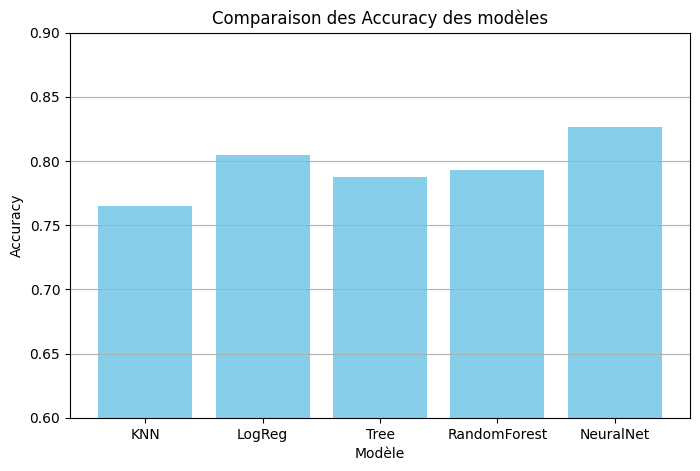

In [55]:
#visualisation des performances
model_names = ['KNN', 'LogReg', 'Tree', 'RandomForest', 'NeuralNet']
accuracies = [knn_accuracy_score, logreg_accuracy_score, best_tree_accuracy_score, best_rf_accuracy_score, nn_accuracy_score]  
plt.figure(figsize=(8,5))
plt.bar(model_names, accuracies, color='skyblue')
plt.ylim(0.6, 0.9)
plt.title('Comparaison des Accuracy des modèles')
plt.ylabel('Accuracy')
plt.xlabel('Modèle')
plt.grid(True, axis='y')
plt.show()


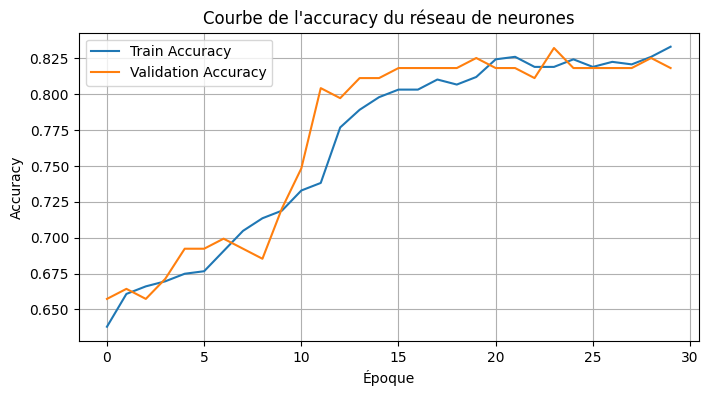

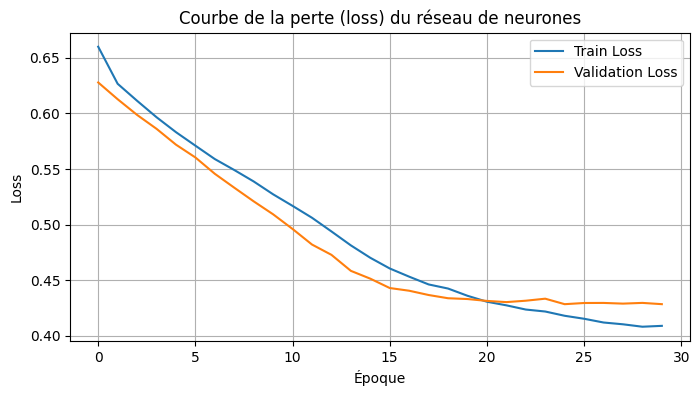

In [79]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Courbe de l\'accuracy du réseau de neurones')
plt.xlabel('Époque')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Tracer la courbe de la loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Courbe de la perte (loss) du réseau de neurones')
plt.xlabel('Époque')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

<span style='color:yellow'>**Observations** : </span></br>

- **Bonne convergence** : Le modèle semble apprendre efficacement, avec les deux métriques s'améliorant significativement du début à la fin.
- **Pas de surapprentissage** : L'alignement étroit entre les courbes d'entraînement et de validation suggère que le modèle généralise bien. Il n'y a pas d'écart significatif indiquant un surapprentissage.

## <span style='color:brown'>**Conclusion Finale** : </span></br>
### Classement Performance
1. **Réseau de neurones simples** : 82,7% - 19 survivants manqués
2. **Régression Logistique** : 80,4% - 23 survivants manqués
3. **Random Forest** : 79,3% - 28 survivants manqués
4. **Arbre de Décision** : 78,8% - 32 survivants manqués
5. **K-Nearest Neighbors** : 76,5% - 28 survivants manqués

### Performance Classe 0 (non-Survivants)

Meilleur rappel : Arbre de Décision (95%)
Pire rappel : K-Nearest Neighbors Regressor (87%)

### Performance Classe 1 (Survivants)

Meilleur rappel : Réseau de neurones simples (72%)
Pire rappel : Arbre de Décision (54%)

### Variables Importantes
Les variables les plus importantes dans cette analyse sont : **Sex, Age, Pclass**

### Conclusion 
Le **Réseau de Neurones** s'impose comme la solution optimale avec 82,7% d'accuracy et seulement 19 survivants manqués. Pour des applications nécessitant une interprétabilité (Quand comprendre pourquoi une décision a été prise est important), la **Régression Logistique** reste un excellent choix avec 80,4% d'accuracy.